<a href="https://colab.research.google.com/github/spdr-lily/Data-Science-Profile/blob/main/webscraping_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

# Ação da Microsoft

In [26]:
acao = input("Digite o nome da ação: ")

ticker = yf.Ticker(acao)

hist = ticker.history(period="1d", start="2022-01-01", end="2023-01-01")

print(hist)

Digite o nome da ação: MSFT
                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  326.218372  328.796207  320.800037  325.634705   
2022-01-04 00:00:00-05:00  325.712617  326.072567  317.239797  320.051117   
2022-01-05 00:00:00-05:00  316.986794  317.191097  307.375852  307.764954   
2022-01-06 00:00:00-05:00  304.622936  310.021828  303.008134  305.333069   
2022-01-07 00:00:00-05:00  305.595791  307.881807  301.646345  305.488800   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  231.832892  234.542889  229.702203  234.405426   
2022-12-27 00:00:00-05:00  234.375966  234.601796  231.557961  232.667496   
2022-12-28 00:00:00-05:00  232.598774  235.377511  229.928045  230.281525   
2022-12-29 00:00:00-05:00  231.381200  237.537623  231.381200  236.644104   
2022-12-30 00:00:00-05:00  233.894842  235.61314

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

symbol = input("Digite o nome da ação: ")

ticker = yf.Ticker(symbol)

historico = ticker.history(period="1y")

df = pd.DataFrame(historico['Close'])

df.reset_index(inplace=True)

Digite o nome da ação: MSFT


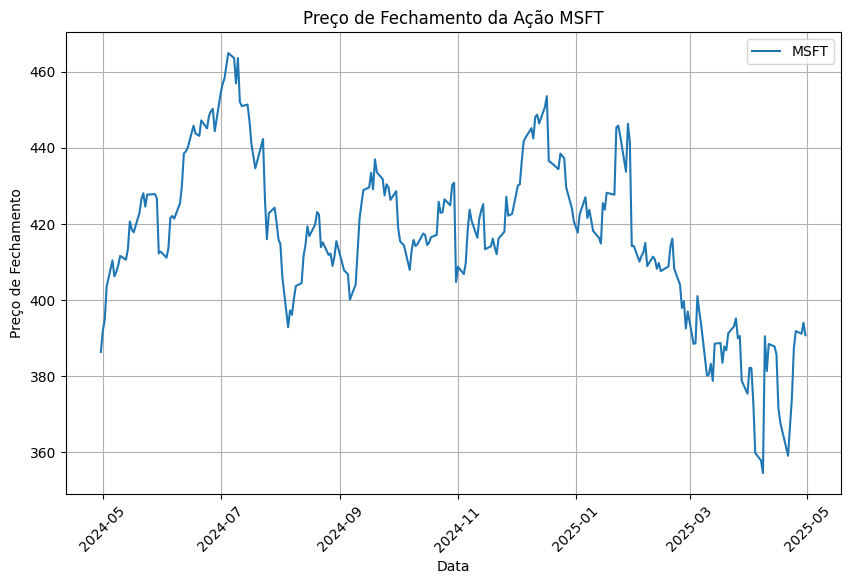

In [30]:
# Criando gráfico para visualização
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df, label=symbol)
plt.title(f'Preço de Fechamento da Ação {symbol}')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Ação do Google

In [31]:
acao = input("Digite o nome da ação: ")

ticker = yf.Ticker(acao)

hist = ticker.history(period="1d", start="2022-01-01", end="2023-01-01")

print(hist)

Digite o nome da ação: googl
                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  144.364780  145.156997  143.029170  144.301590   
2022-01-04 00:00:00-05:00  144.704182  145.788005  143.032684  143.712433   
2022-01-05 00:00:00-05:00  143.732832  143.811952  137.032869  137.119446   
2022-01-06 00:00:00-05:00  136.346658  139.274160  135.908749  137.092087   
2022-01-07 00:00:00-05:00  137.488176  137.789743  135.120498  136.365051   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00   86.695512   89.123905   86.655702   88.805428   
2022-12-27 00:00:00-05:00   88.377469   88.516802   86.595985   86.974174   
2022-12-28 00:00:00-05:00   86.566141   87.621095   85.531089   85.610703   
2022-12-29 00:00:00-05:00   86.207850   88.427235   86.197895   88.029137   
2022-12-30 00:00:00-05:00   86.566129   87.8798

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

symbol = input("Digite o nome da ação: ")

ticker = yf.Ticker(symbol)

historico = ticker.history(period="1y")

df = pd.DataFrame(historico['Close'])

df.reset_index(inplace=True)

Digite o nome da ação: googl


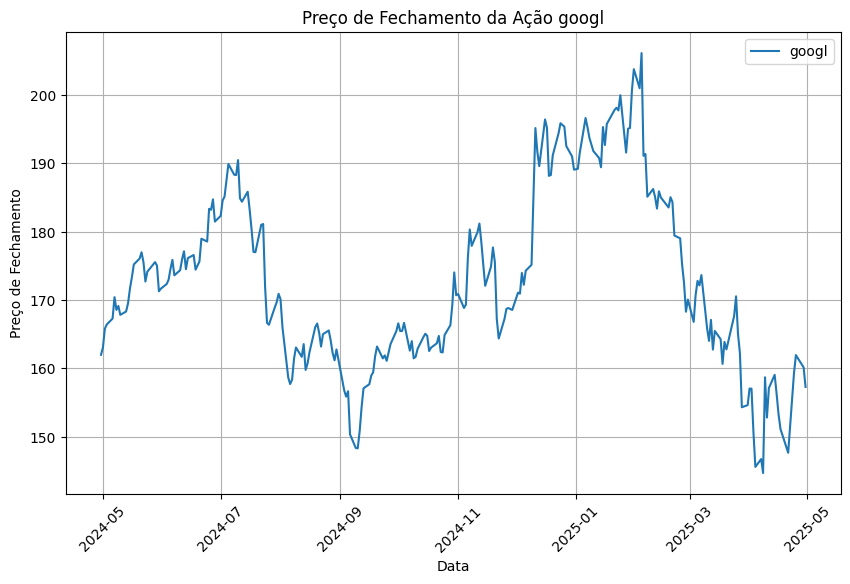

In [33]:
# Criando gráfico para visualização
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df, label=symbol)
plt.title(f'Preço de Fechamento da Ação {symbol}')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Comparando Ações

In [36]:
symbols = ['MSFT', 'GOOGL']

def get_history (symbol):
  ticker = yf.Ticker(symbol)
  data = ticker.history(period="1y")['Close']
  return pd.DataFrame({symbol: data})

data_frames = [get_history(symbol) for symbol in symbols]
df = pd.concat(data_frames, axis=1)

print(df.head())

                                 MSFT       GOOGL
Date                                             
2024-04-30 00:00:00-04:00  386.380127  162.005478
2024-05-01 00:00:00-04:00  391.947632  163.080338
2024-05-02 00:00:00-04:00  394.825653  165.827194
2024-05-03 00:00:00-04:00  403.578827  166.444244
2024-05-06 00:00:00-04:00  410.406708  167.300156


<Figure size 1000x600 with 0 Axes>

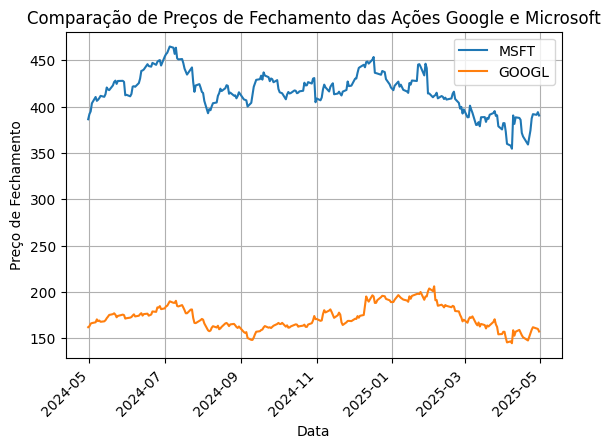

In [39]:
# gerando gráfico
plt.figure(figsize=(10, 6))
df.plot()
plt.title('Comparação de Preços de Fechamento das Ações Google e Microsoft')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.xticks(rotation=45)
plt.legend(symbols)
plt.grid(True)
plt.show()

In [41]:
# Calcula o retorno diário usando pct_change() para cada ação
df['MSFT Retorno Diário'] = df['MSFT'].pct_change()
df['GOOGL Retorno Diário'] = df['GOOGL'].pct_change()

# Imprime as primeiras linhas do DataFrame com as novas colunas de retorno diário
print(df.head())

                                 MSFT       GOOGL  MSFT Retorno Diário  \
Date                                                                     
2024-04-30 00:00:00-04:00  386.380127  162.005478                  NaN   
2024-05-01 00:00:00-04:00  391.947632  163.080338             0.014409   
2024-05-02 00:00:00-04:00  394.825653  165.827194             0.007343   
2024-05-03 00:00:00-04:00  403.578827  166.444244             0.022170   
2024-05-06 00:00:00-04:00  410.406708  167.300156             0.016918   

                           GOOGL Retorno Diário  
Date                                             
2024-04-30 00:00:00-04:00                   NaN  
2024-05-01 00:00:00-04:00              0.006635  
2024-05-02 00:00:00-04:00              0.016844  
2024-05-03 00:00:00-04:00              0.003721  
2024-05-06 00:00:00-04:00              0.005142  


In [42]:
# Calcula o retorno cumulativo para a Microsoft
df['MSFT Retorno Cumulativo'] = (1 + df['MSFT Retorno Diário']).cumprod()

# Calcula o retorno cumulativo para o Google (Alphabet)
df['GOOGL Retorno Cumulativo'] = (1 + df['GOOGL Retorno Diário']).cumprod()

# Imprime as últimas linhas do DataFrame com as novas colunas de retorno cumulativo
print(df.tail())

                                 MSFT       GOOGL  MSFT Retorno Diário  \
Date                                                                     
2025-04-24 00:00:00-04:00  387.299988  159.279999             0.034483   
2025-04-25 00:00:00-04:00  391.850006  161.960007             0.011748   
2025-04-28 00:00:00-04:00  391.160004  160.610001            -0.001761   
2025-04-29 00:00:00-04:00  394.040009  160.160004             0.007363   
2025-04-30 00:00:00-04:00  390.420013  157.365005            -0.009187   

                           GOOGL Retorno Diário  MSFT Retorno Cumulativo  \
Date                                                                       
2025-04-24 00:00:00-04:00              0.025298                 1.002381   
2025-04-25 00:00:00-04:00              0.016826                 1.014157   
2025-04-28 00:00:00-04:00             -0.008335                 1.012371   
2025-04-29 00:00:00-04:00             -0.002802                 1.019825   
2025-04-30 00:00:00-04:00

In [43]:
# Calcula o retorno médio diário para a Microsoft
retorno_medio_diario_msft = df['MSFT Retorno Diário'].mean()

# Calcula o retorno médio diário para o Google (Alphabet)
retorno_medio_diario_googl = df['GOOGL Retorno Diário'].mean()

# Imprime os resultados
print(f"Retorno médio diário da Microsoft: {retorno_medio_diario_msft:.6f}")
print(f"Retorno médio diário do Google (GOOGL): {retorno_medio_diario_googl:.6f}")

Retorno médio diário da Microsoft: 0.000161
Retorno médio diário do Google (GOOGL): 0.000061


In [44]:
# Calcula o desvio padrão dos retornos diários para a Microsoft
desvio_padrao_diario_msft = df['MSFT Retorno Diário'].std()

# Calcula o desvio padrão dos retornos diários para o Google (Alphabet)
desvio_padrao_diario_googl = df['GOOGL Retorno Diário'].std()

# Imprime os resultados
print(f"Desvio padrão diário da Microsoft: {desvio_padrao_diario_msft:.6f}")
print(f"Desvio padrão diário do Google (GOOGL): {desvio_padrao_diario_googl:.6f}")

Desvio padrão diário da Microsoft: 0.015509
Desvio padrão diário do Google (GOOGL): 0.018880


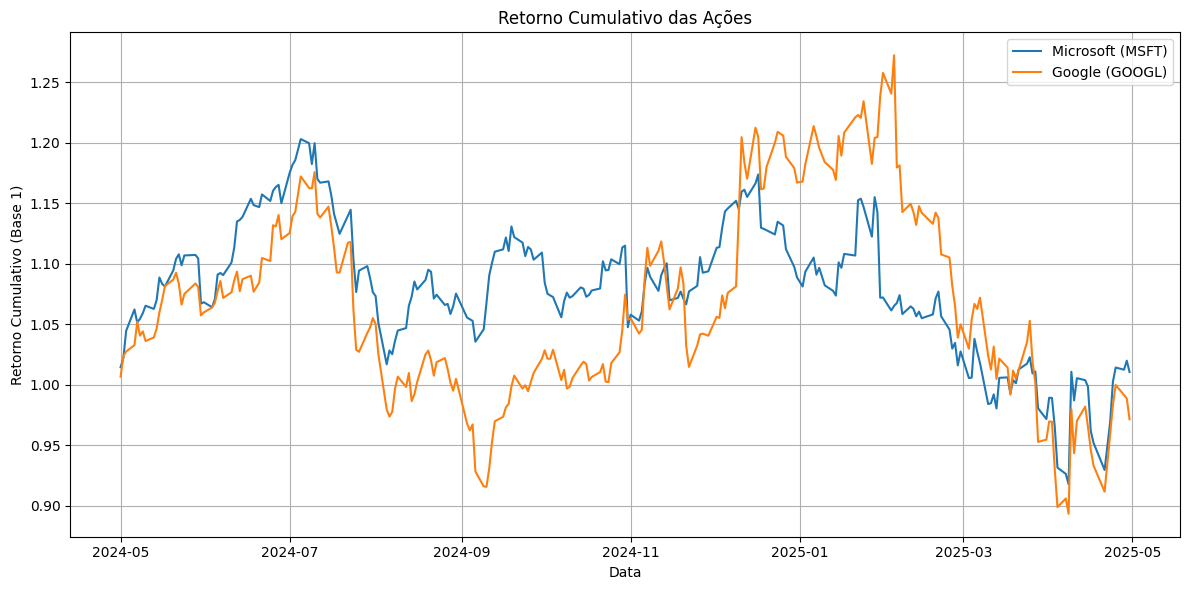

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MSFT Retorno Cumulativo'], label='Microsoft (MSFT)')
plt.plot(df.index, df['GOOGL Retorno Cumulativo'], label='Google (GOOGL)')
plt.title('Retorno Cumulativo das Ações')
plt.xlabel('Data')
plt.ylabel('Retorno Cumulativo (Base 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()